# Análise dos votos de 2022 no Brasil

## Configuração de ambiente

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Verificando o uso de GPU

In [2]:
!nvidia-smi

Sun Aug 10 19:05:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.10              Driver Version: 570.86.10      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   57C    P8              6W /   80W |      56MiB /   6144MiB |     58%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Visualização do Dataset

### Importação do dataset

In [3]:
url = 'https://drive.usercontent.google.com/download?id=1P-l0wJZIyNT8SW-nqIc58GWLijeDFPl4&export=download&authuser=0&confirm=t&uuid=fa3507e4-0dd5-4e9c-b993-0ac46e4a5c45&at=AN8xHop5EI6WPBglkEOBttw0wUbL%3A1754862735577'
dt_votos = pd.read_csv(url)

/tmp/ipykernel_102094/3006866249.py:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_votos = pd.read_csv(url)


### Visualização das colunas

In [4]:
dt_votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,05/10/2022,13:21:57,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,02/10/2022 06:00:01,02/10/2022 15:01:09,4,02/10/2022 15:04:15,-1,-1
1,05/10/2022,13:21:57,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,02/10/2022 06:00:01,02/10/2022 15:01:09,4,02/10/2022 15:04:15,-1,-1
2,05/10/2022,13:21:57,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,02/10/2022 06:00:01,02/10/2022 15:01:09,4,02/10/2022 15:04:15,-1,-1
3,05/10/2022,13:21:57,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,02/10/2022 06:00:01,02/10/2022 15:01:09,4,02/10/2022 15:04:15,-1,-1
4,05/10/2022,13:21:57,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,02/10/2022 06:00:01,02/10/2022 15:01:09,4,02/10/2022 15:04:15,-1,-1


In [5]:
dt_votos['DS_ELEICAO'].unique()

array(['Eleição Geral Federal 2022'], dtype=object)

Segundo o dataset, temos algumas siglas, sua descrição é:

CD - Codigo
<br>
DT - Data
<br>
DS - Descrição
<br>
SG - Sigla
<br>
NM - Nome
<br>
QT - Quantidade

### Filtragem do dataframe

Conhecendo as colunas agora, posso selecionar algumas, como:
- ANO_ELEICAO;
- NR_TURNO;
- DS_ELEICAO;
- SG_UF;
- NM_MUNICIPIO;
- DS_CARGO_PERGUNTA;
- NR_PARTIDO;
- SG_PARTIDO;
- NM_PARTIDO;
- QT_APTOS;
- QT_COMPARECIMENTO;
- QT_ABSTENCOES;
- DS_TIPO_URNA;
- DS_TIPO_VOTAVEL;
- NR_VOTAVEL;
- NM_VOTAVEL;
- QT_VOTOS;
- NR_URNA_EFETIVADA;


In [6]:
colunas_selecionadas = [
    'ANO_ELEICAO', 'NR_TURNO', 'DS_ELEICAO',
    'SG_UF', 'NM_MUNICIPIO', 'DS_CARGO_PERGUNTA',
    'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'QT_APTOS', 'QT_COMPARECIMENTO',
    'QT_ABSTENCOES', 'DS_TIPO_URNA', 'DS_TIPO_VOTAVEL',
    'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA'
]

dt_votos_filtrados = dt_votos[colunas_selecionadas]
dt_votos_filtrados.head()

,ANO_ELEICAO,NR_TURNO,DS_ELEICAO,SG_UF,NM_MUNICIPIO,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,DS_TIPO_URNA,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA
0,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,#NULO#,#NULO#,185,155,30,APURADA,Nulo,96,Nulo,1,2046404
1,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,15,MDB,Movimento Democrático Brasileiro,185,155,30,APURADA,Nominal,15,SIMONE TEBET,11,2046404
2,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,#NULO#,#NULO#,185,155,30,APURADA,Branco,95,Branco,2,2046404
3,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,13,PT,Partido dos Trabalhadores,185,155,30,APURADA,Nominal,13,LULA,44,2046404
4,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,22,PL,Partido Liberal,185,155,30,APURADA,Nominal,22,JAIR BOLSONARO,91,2046404


Após a filtragem do dataframe, irei renomear as colunas para melhor entendimento.

In [7]:
dt_votos_filtrados = dt_votos_filtrados.rename(columns={
    'ANO_ELEICAO': 'Ano_Eleicao',
    'NR_TURNO': 'Numero_Turno',
    'CD_ELEICAO': 'Codigo_Eleicao',
    'DS_ELEICAO': 'Descricao_Eleicao',
    'SG_UF': 'Sigla_UF',
    'CD_MUNICIPIO': 'Codigo_Municipio',
    'NM_MUNICIPIO': 'Nome_Municipio',
    'CD_CARGO_PERGUNTA': 'Codigo_Cargo',
    'DS_CARGO_PERGUNTA': 'Descricao_Cargo',
    'NR_PARTIDO': 'Numero_Partido',
    'SG_PARTIDO': 'Sigla_Partido',
    'NM_PARTIDO': 'Nome_Partido',
    'QT_APTOS': 'Quantidade_Aptos',
    'QT_COMPARECIMENTO': 'Quantidade_Comparecimento',
    'QT_ABSTENCOES': 'Quantidade_Abstencoes',
    'CD_TIPO_URNA': 'Codigo_Tipo_Urna',
    'DS_TIPO_URNA': 'Descricao_Tipo_Urna',
    'CD_TIPO_VOTAVEL': 'Codigo_Tipo_Votavel',
    'DS_TIPO_VOTAVEL': 'Descricao_Tipo_Votavel',
    'NR_VOTAVEL': 'Numero_Votavel',
    'NM_VOTAVEL': 'Nome_Votavel',
    'QT_VOTOS': 'Quantidade_Votos',
    'NR_URNA_EFETIVADA': 'Numero_Urna_Efetivada'
})

## Tratamento dos dados

### Analisando o que é null de verdade

In [8]:
dt_votos_filtrados.replace(['#NULO#', '', ' ', 'NULL', 'nan'], np.nan, inplace=True)

In [9]:
dt_votos_filtrados.head()

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,NaN,NaN,185,155,30,APURADA,Nulo,96,Nulo,1,2046404
1,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,15,MDB,Movimento Democrático Brasileiro,185,155,30,APURADA,Nominal,15,SIMONE TEBET,11,2046404
2,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,NaN,NaN,185,155,30,APURADA,Branco,95,Branco,2,2046404
3,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,13,PT,Partido dos Trabalhadores,185,155,30,APURADA,Nominal,13,LULA,44,2046404
4,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,22,PL,Partido Liberal,185,155,30,APURADA,Nominal,22,JAIR BOLSONARO,91,2046404


In [10]:
dt_votos_filtrados.isnull().sum()

Ano_Eleicao                        0
Numero_Turno                       0
Descricao_Eleicao                  0
Sigla_UF                           0
Nome_Municipio                     0
Descricao_Cargo                    0
Numero_Partido                     0
Sigla_Partido                1812811
Nome_Partido                 1812811
Quantidade_Aptos                   0
Quantidade_Comparecimento          0
Quantidade_Abstencoes              0
Descricao_Tipo_Urna                0
Descricao_Tipo_Votavel             0
Numero_Votavel                     0
Nome_Votavel                       0
Quantidade_Votos                   0
Numero_Urna_Efetivada              0
dtype: int64

É possível observar que há 1812811 valores nulos em Sigla_Partido e Nome_Partido, e esse alto valor se dá por conta dos votos nulos e brancos, pois eles anulam essas colunas.

In [11]:
dt_votos_filtrados.shape

(5380736, 18)

In [12]:
dt_votos_filtrados['Descricao_Tipo_Votavel'].unique()

array(['Nulo', 'Nominal', 'Branco'], dtype=object)

Com isso em mente, vamos tentar comparar a quantidade desses votos nulos e brancos e descartar eles dessa comparação de nulabilidade.

In [13]:
votos_brancos = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Branco']
votos_nulos = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nulo']
votos_anulados = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Anulado e apurado em separado']

In [14]:
qtd_votos_brancos = len(votos_brancos)
qtd_votos_nulos = len(votos_nulos)
qtd_votos_anulados = len(votos_anulados)
total_qtd_votos = qtd_votos_brancos + qtd_votos_nulos + qtd_votos_anulados

In [15]:
print(total_qtd_votos)

1812811


In [16]:
print(1812811 - total_qtd_votos)

0


In [17]:
dt_votos_filtrados[['Numero_Partido', 'Sigla_Partido', 'Nome_Partido']] = dt_votos_filtrados[['Numero_Partido', 'Sigla_Partido', 'Nome_Partido']].fillna('Não escolhido')

In [18]:
dt_votos_filtrados

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,Não escolhido,Não escolhido,185,155,30,APURADA,Nulo,96,Nulo,1,2046404
1,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,15,MDB,Movimento Democrático Brasileiro,185,155,30,APURADA,Nominal,15,SIMONE TEBET,11,2046404
2,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,-1,Não escolhido,Não escolhido,185,155,30,APURADA,Branco,95,Branco,2,2046404
3,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,13,PT,Partido dos Trabalhadores,185,155,30,APURADA,Nominal,13,LULA,44,2046404
4,2022,1,Eleição Geral Federal 2022,AC,RIO BRANCO,Presidente,22,PL,Partido Liberal,185,155,30,APURADA,Nominal,22,JAIR BOLSONARO,91,2046404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380731,2022,2,Eleição Geral Federal 2022,ZZ,LISBOA,Presidente,22,PL,Partido Liberal,639,338,301,APURADA,Nominal,22,JAIR BOLSONARO,115,1023396
5380732,2022,2,Eleição Geral Federal 2022,ZZ,LISBOA,Presidente,13,PT,Partido dos Trabalhadores,696,385,311,APURADA,Nominal,13,LULA,270,1019971
5380733,2022,2,Eleição Geral Federal 2022,ZZ,LISBOA,Presidente,22,PL,Partido Liberal,696,385,311,APURADA,Nominal,22,JAIR BOLSONARO,110,1019971
5380734,2022,2,Eleição Geral Federal 2022,ZZ,LISBOA,Presidente,-1,Não escolhido,Não escolhido,696,385,311,APURADA,Nulo,96,Nulo,1,1019971


### Tratando os tipos de cada coluna

In [19]:
dt_votos_filtrados.dtypes

Ano_Eleicao                   int64
Numero_Turno                  int64
Descricao_Eleicao            object
Sigla_UF                     object
Nome_Municipio               object
Descricao_Cargo              object
Numero_Partido                int64
Sigla_Partido                object
Nome_Partido                 object
Quantidade_Aptos              int64
Quantidade_Comparecimento     int64
Quantidade_Abstencoes         int64
Descricao_Tipo_Urna          object
Descricao_Tipo_Votavel       object
Numero_Votavel                int64
Nome_Votavel                 object
Quantidade_Votos              int64
Numero_Urna_Efetivada         int64
dtype: object

A tipagem de todas as colunas nesse dataset está ok.

### Criando a coluna região

In [20]:
regioes_br = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

In [21]:
def get_regiao(sigla_uf):
    for regiao, estados in regioes_br.items():
        if sigla_uf in estados:
            return regiao
    return 'Estrangeiro'

In [22]:
dt_votos_filtrados['Regiao'] = dt_votos_filtrados['Sigla_UF'].apply(get_regiao)

## Análise dos dados

### Quantidade de votos por turno

In [23]:
dt_votos_por_turno = dt_votos_filtrados.groupby('Numero_Turno')['Quantidade_Votos'].sum().sort_values(ascending=False)

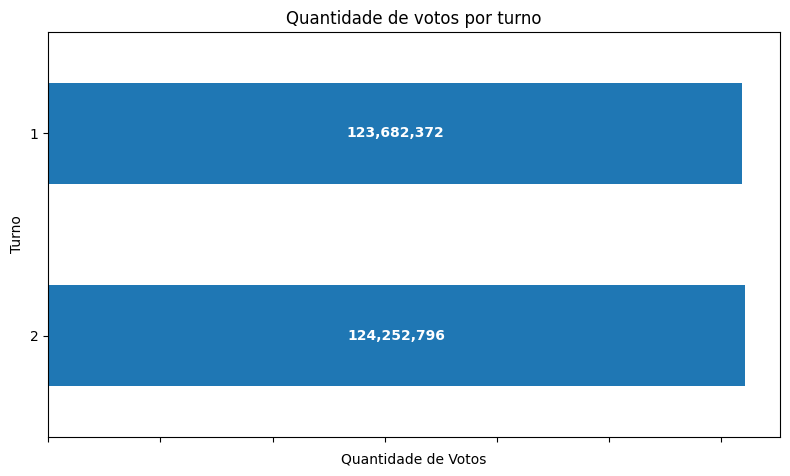

In [24]:
plt.figure(figsize=(8,5))
ax = dt_votos_por_turno.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Turno')
plt.tight_layout()
ax.set_xticklabels([])

for i, v in enumerate(dt_votos_por_turno):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_turno) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_turno)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por tipo

#### Filtro: 1º Turno

In [25]:
dt_votos_tipo_turno_1 = dt_votos_filtrados[dt_votos_filtrados['Numero_Turno'] == 1]
dt_votos_tipo_sum_1 = dt_votos_tipo_turno_1.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

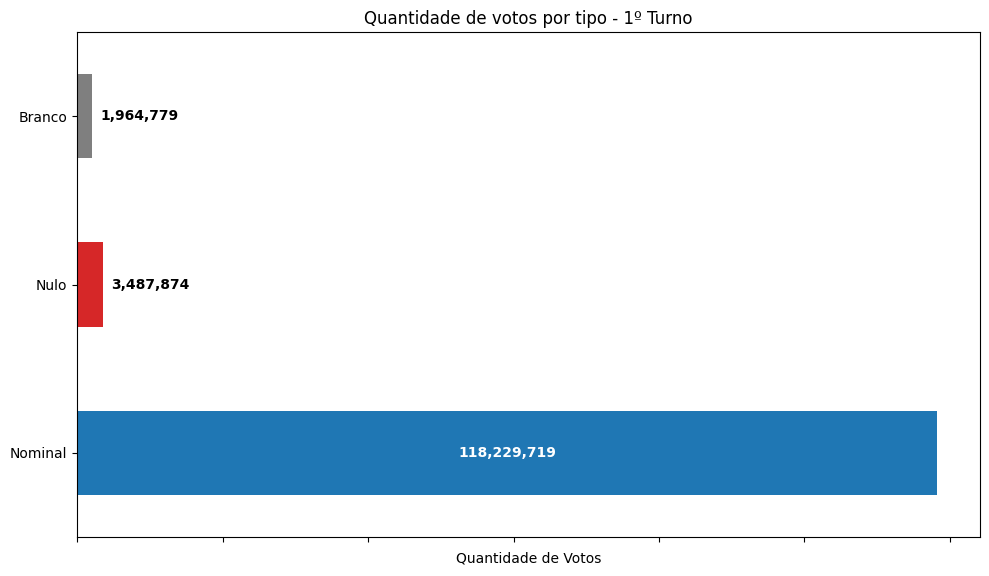

In [26]:
plt.figure(figsize=(10,6))
ax1 = dt_votos_tipo_sum_1.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos por tipo - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_sum_1):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_sum_1) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(dt_votos_tipo_sum_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno

In [27]:
dt_votos_tipo_turno_2 = dt_votos_filtrados[dt_votos_filtrados['Numero_Turno'] == 2]
dt_votos_tipo_sum_2 = dt_votos_tipo_turno_2.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

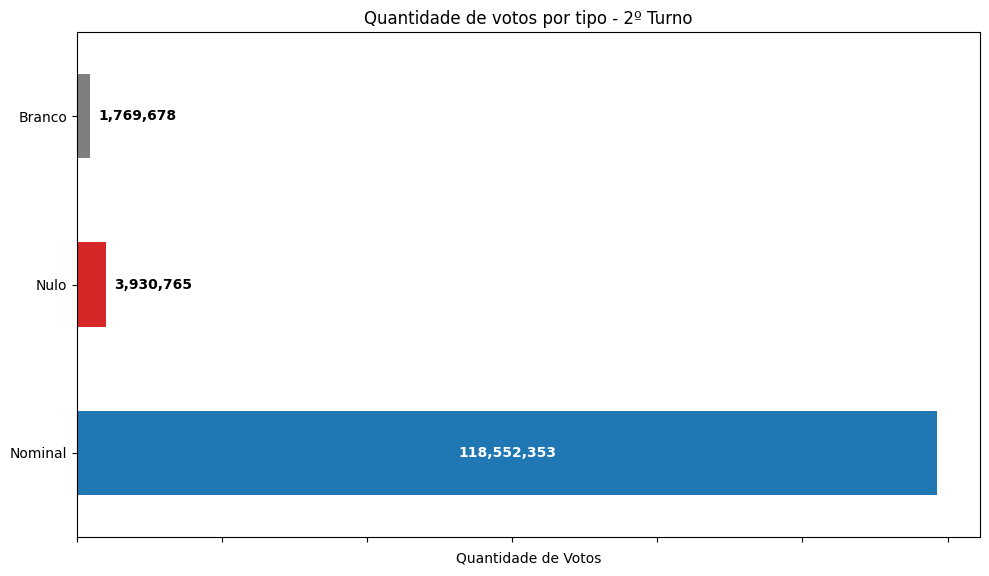

In [28]:
plt.figure(figsize=(10,6))
ax2 = dt_votos_tipo_sum_2.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos por tipo - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('')
plt.tight_layout()
ax2.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_sum_2):
    largura_barra = ax2.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_sum_2) * 0.15:
        ax2.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax2.text(largura_barra + max(dt_votos_tipo_sum_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: Nenhum

In [29]:
dt_votos_tipo_total_sum = dt_votos_filtrados.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

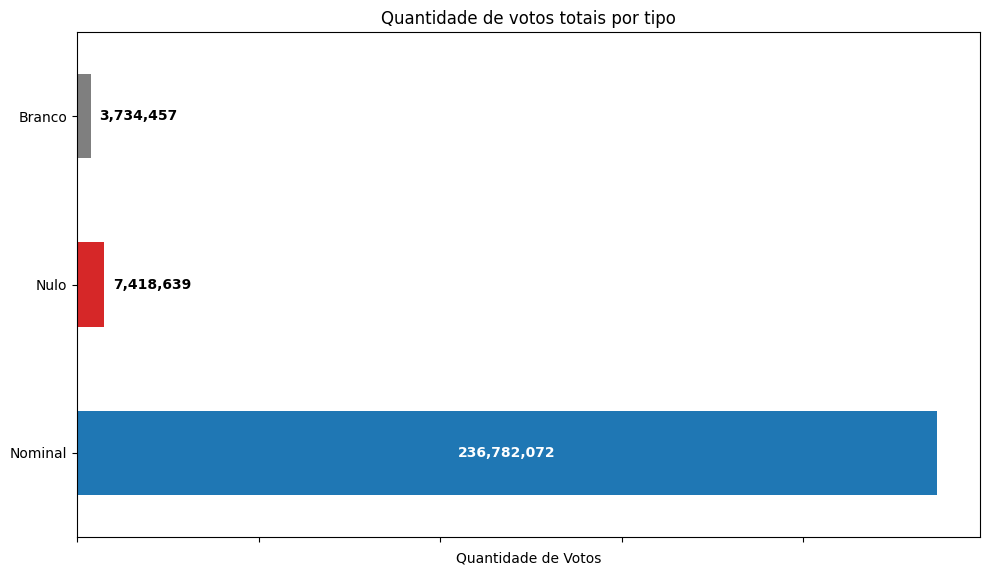

In [30]:
plt.figure(figsize=(10,6))
ax = dt_votos_tipo_total_sum.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos totais por tipo')
plt.xlabel('Quantidade de Votos')
plt.ylabel(ylabel='')
plt.tight_layout()

ax.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_total_sum):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_total_sum) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_tipo_total_sum)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidades de votos por região

#### Filtros: 1º Turno

In [31]:
dt_votos_nominais_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
dt_votos_por_regiao_1 = dt_votos_nominais_1.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

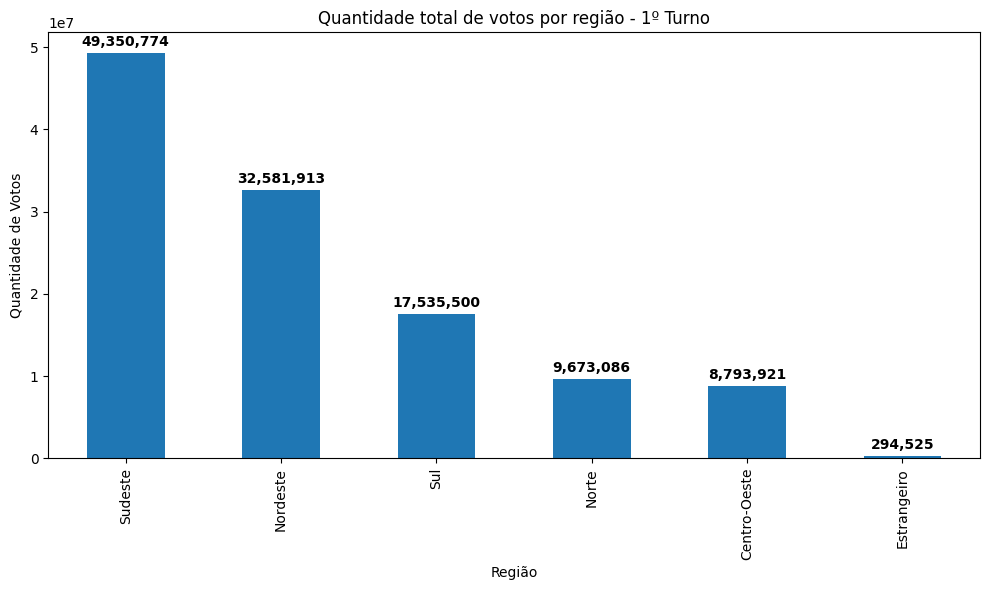

In [32]:
plt.figure(figsize=(10,6))
ax = dt_votos_por_regiao_1.plot(kind='bar', color='tab:blue')
plt.title('Quantidade total de votos por região - 1º Turno')
plt.xlabel('Região')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_1):
    altura_barra = ax.patches[i].get_height()
    texto = f'{v:,}'
    ax.text(i, altura_barra + max(dt_votos_por_regiao_1)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtros: 2º Turno

In [33]:
dt_votos_nominais_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
dt_votos_por_regiao_2 = dt_votos_nominais_2.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

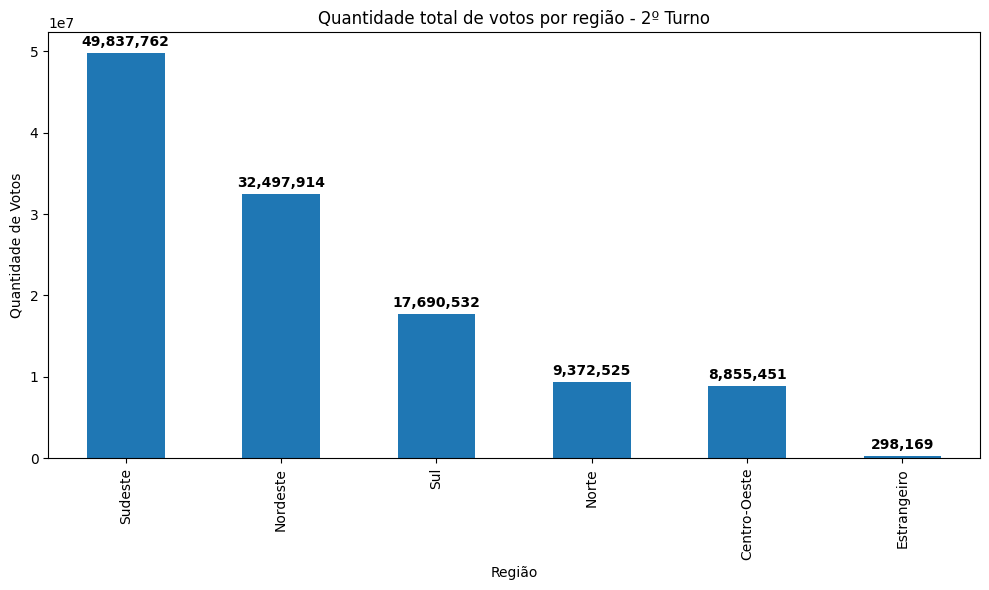

In [34]:
plt.figure(figsize=(10,6))
ax = dt_votos_por_regiao_2.plot(kind='bar', color='tab:blue')
plt.title('Quantidade total de votos por região - 2º Turno')
plt.xlabel('Região')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_2):
    altura_barra = ax.patches[i].get_height()
    texto = f'{v:,}'
    ax.text(i, altura_barra + max(dt_votos_por_regiao_2)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtros: Nenhum

In [35]:
dt_votos_nominais_total = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal']
dt_votos_por_regiao_total = dt_votos_nominais_total.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

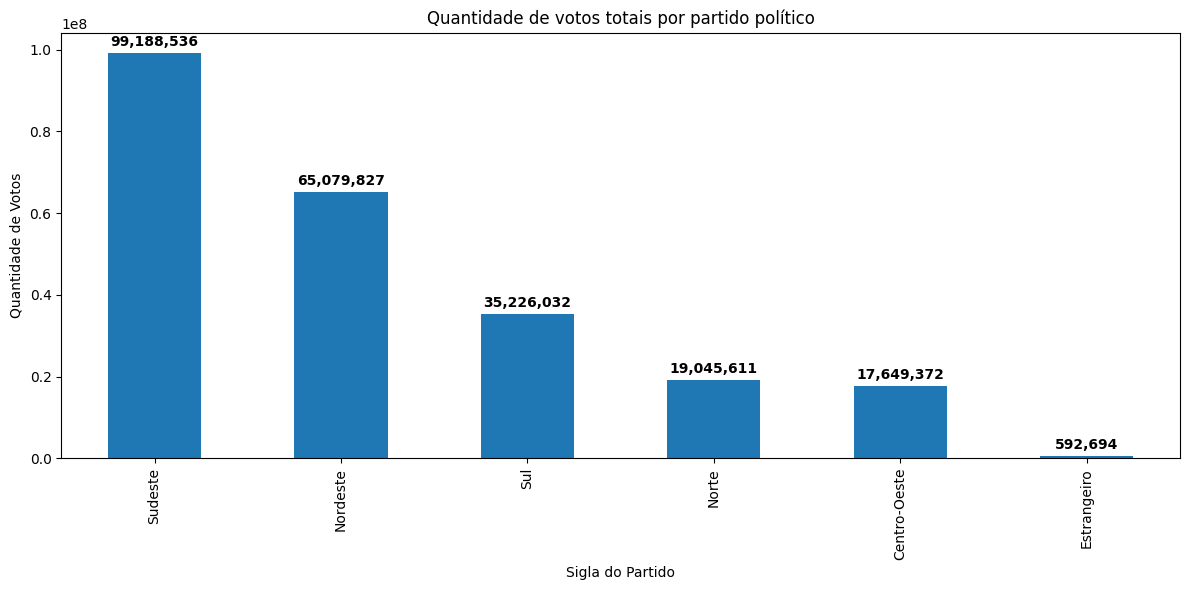

In [36]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_regiao_total.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos totais por partido político')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_total):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_regiao_total)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por estado

In [37]:
estados_br = [
    'AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
    'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
    'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'
]

#### Filtros: 1º Turno

In [38]:
dt_votos_filtrados_estado_1 = dt_votos_nominais_1.copy()
dt_votos_filtrados_estado_1['Sigla_UF'] = dt_votos_filtrados_estado_1['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [39]:
dt_votos_por_estado_1 = dt_votos_filtrados_estado_1.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

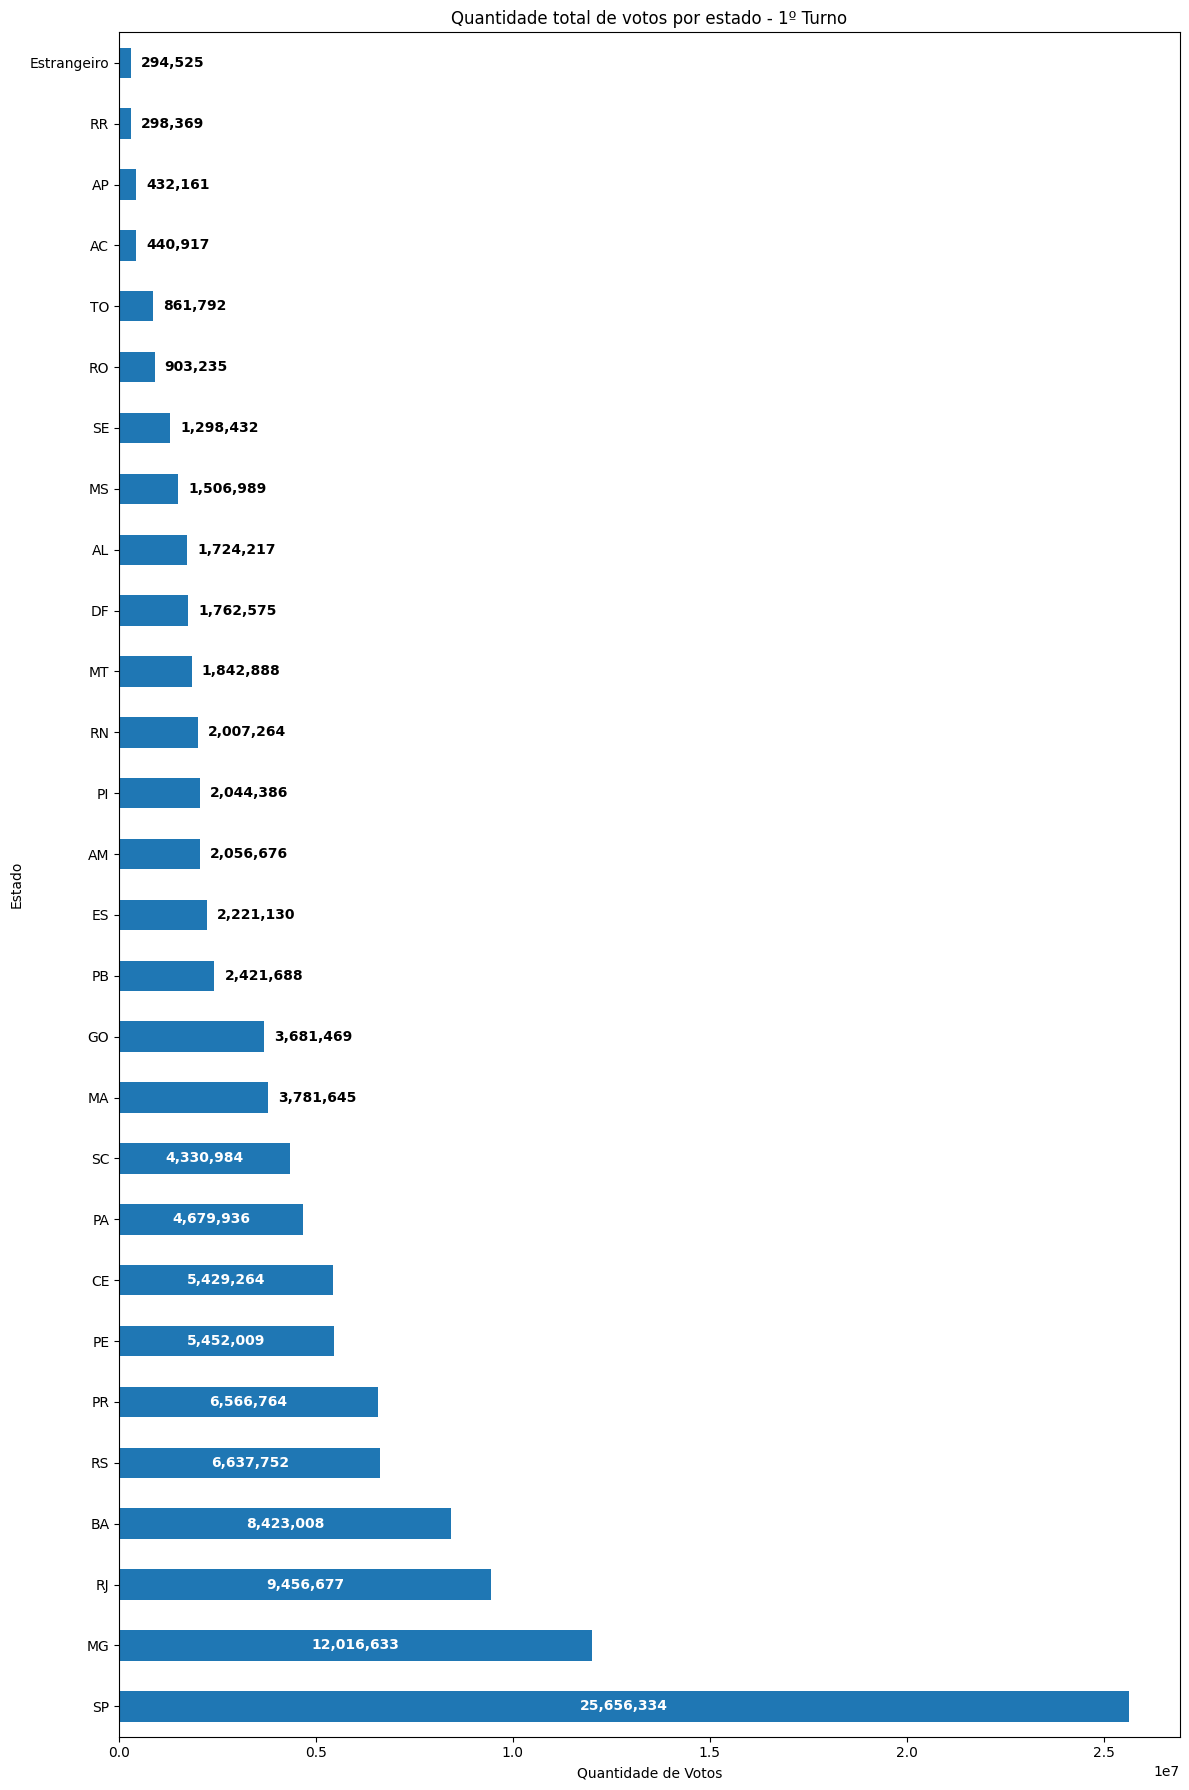

In [40]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_1.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_1):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_1) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtros: 2º Turno

In [41]:
dt_votos_filtrados_estado_2 = dt_votos_nominais_2.copy()
dt_votos_filtrados_estado_2['Sigla_UF'] = dt_votos_filtrados_estado_2['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [42]:
dt_votos_por_estado_2 = dt_votos_filtrados_estado_2.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

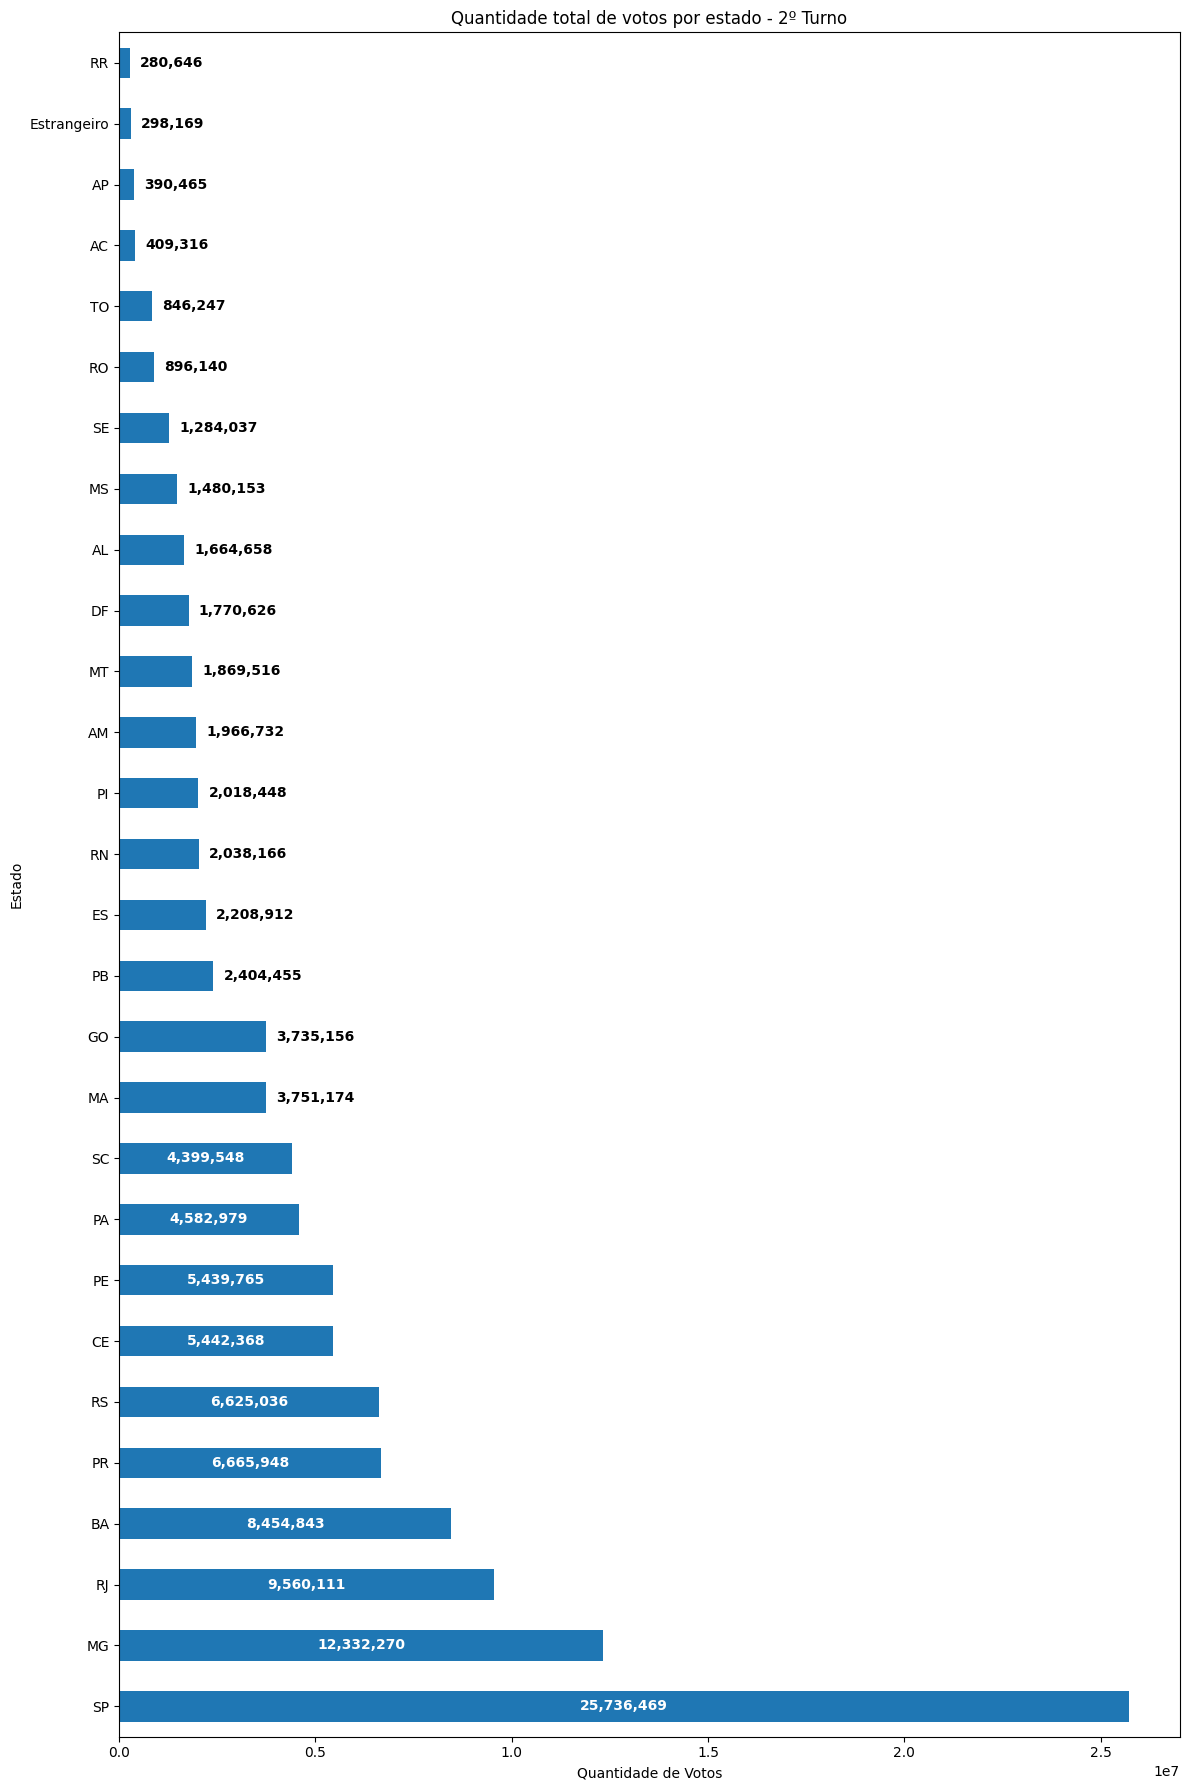

In [43]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_2.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_2):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_2) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtros: Nenhum

In [44]:
dt_votos_nominais = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal')
]

dt_votos_filtrados_estado_total = dt_votos_nominais.copy()
dt_votos_filtrados_estado_total['Sigla_UF'] = dt_votos_filtrados_estado_total['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [45]:
dt_votos_por_estado_total = dt_votos_filtrados_estado_total.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

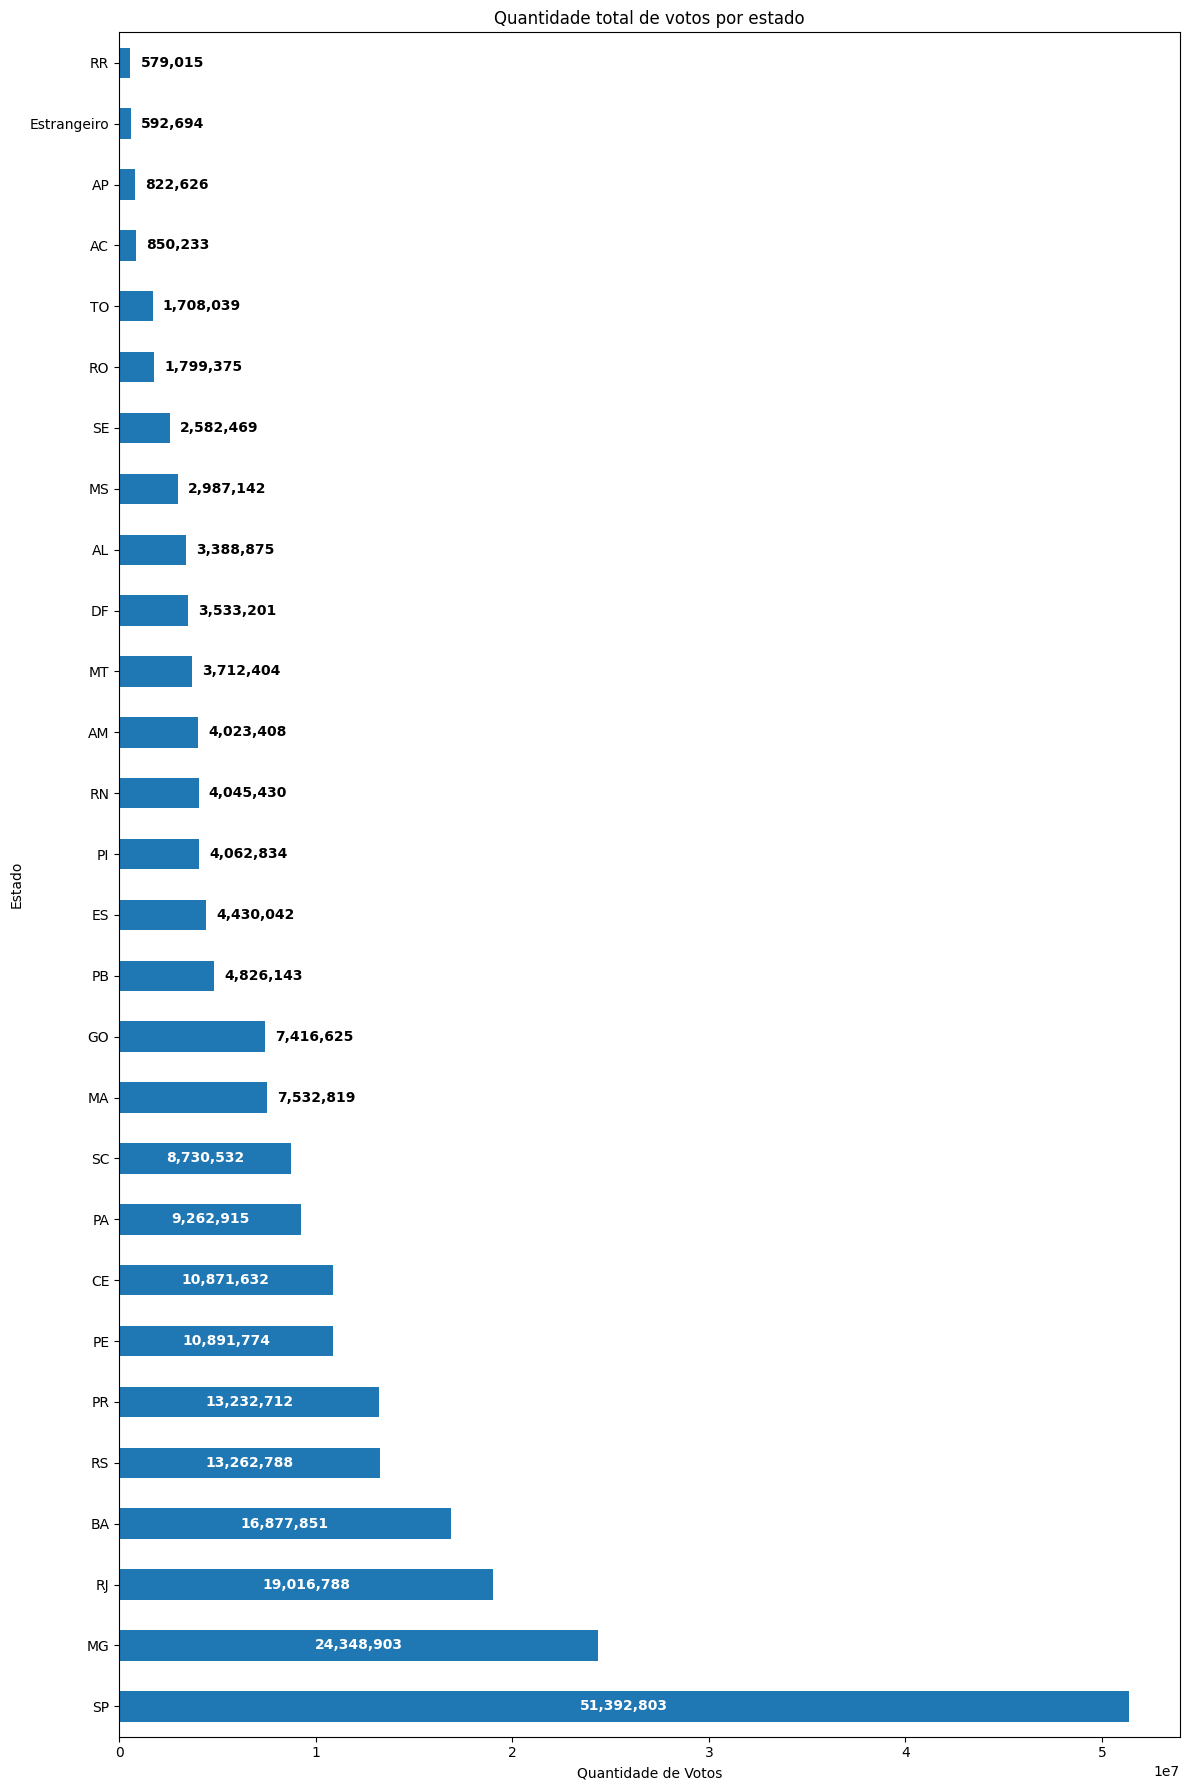

In [46]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_total.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_total):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_total) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_total)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por partido

#### Filtro: 1º Turno

In [47]:
dt_votos_nominais_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
dt_votos_por_partido_1 = dt_votos_nominais_1.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)


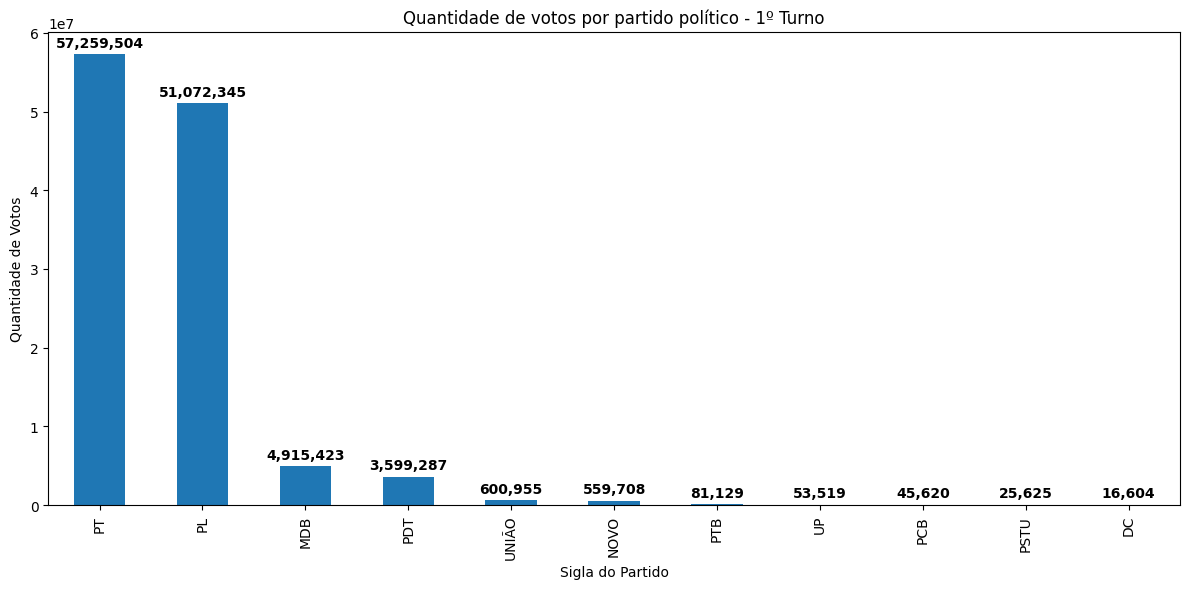

In [48]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_1.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos por partido político - 1º Turno')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_1):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_1)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtro: 1º Turno e Região

In [49]:
dt_votos_partido_regiao_1 = dt_votos_nominais_1.groupby(['Regiao', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

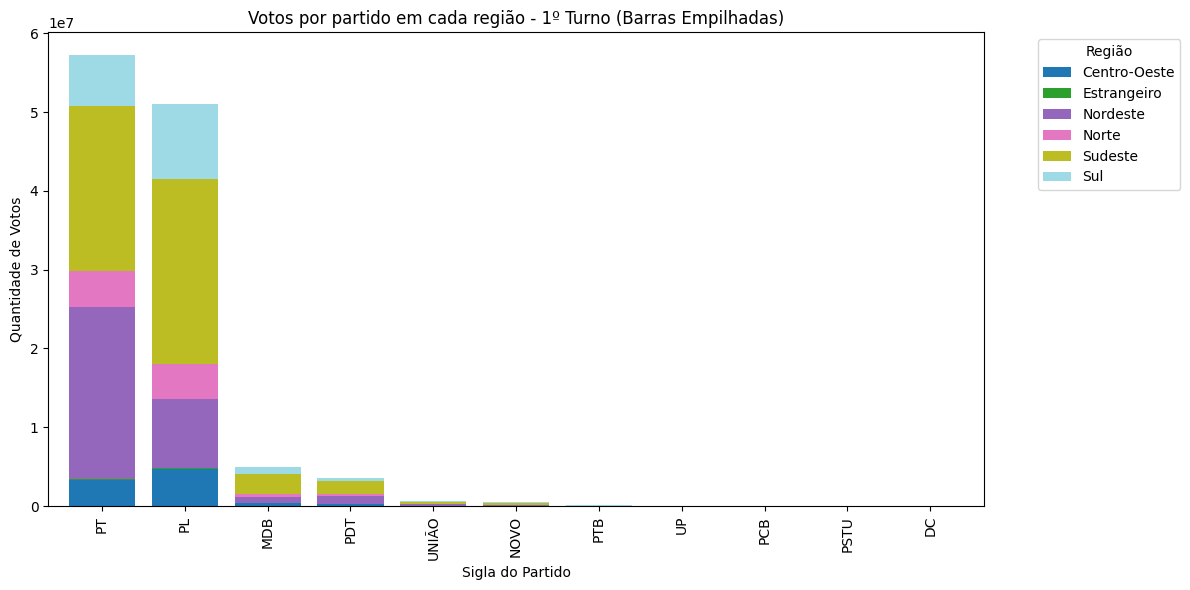

In [50]:
pivot_empilhado = dt_votos_partido_regiao_1.pivot(index='Sigla_Partido', columns='Regiao', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada região - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
tabela_votos_partido_regiao_1 = dt_votos_partido_regiao_1.pivot(
    index='Sigla_Partido',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_regiao_1['Total'] = tabela_votos_partido_regiao_1.sum(axis=1)
tabela_votos_partido_regiao_1 = tabela_votos_partido_regiao_1.sort_values('Total', ascending=False)

In [52]:
tabela_votos_partido_regiao_1

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Sigla_Partido,,,,,,,
PT,3326328,138933,21753139,4554630,21037094,6449380,57259504
PL,4727672,122548,8787394,4396161,23470529,9568041,51072345
MDB,411827,13167,685793,408136,2577548,818952,4915423
PDT,223754,13341,1103631,231771,1566574,460216,3599287
UNIÃO,57302,753,160129,51401,251906,79464,600955
NOVO,31051,3780,45775,17861,333677,127564,559708
PTB,7459,344,21646,6151,32605,12924,81129
UP,3098,319,7292,2049,34658,6103,53519
PCB,2744,618,8673,2115,24515,6955,45620


#### Filtro: 1º Turno e Estado

In [53]:
dt_votos_partido_estado_1 = dt_votos_nominais_1.groupby(['Sigla_UF', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

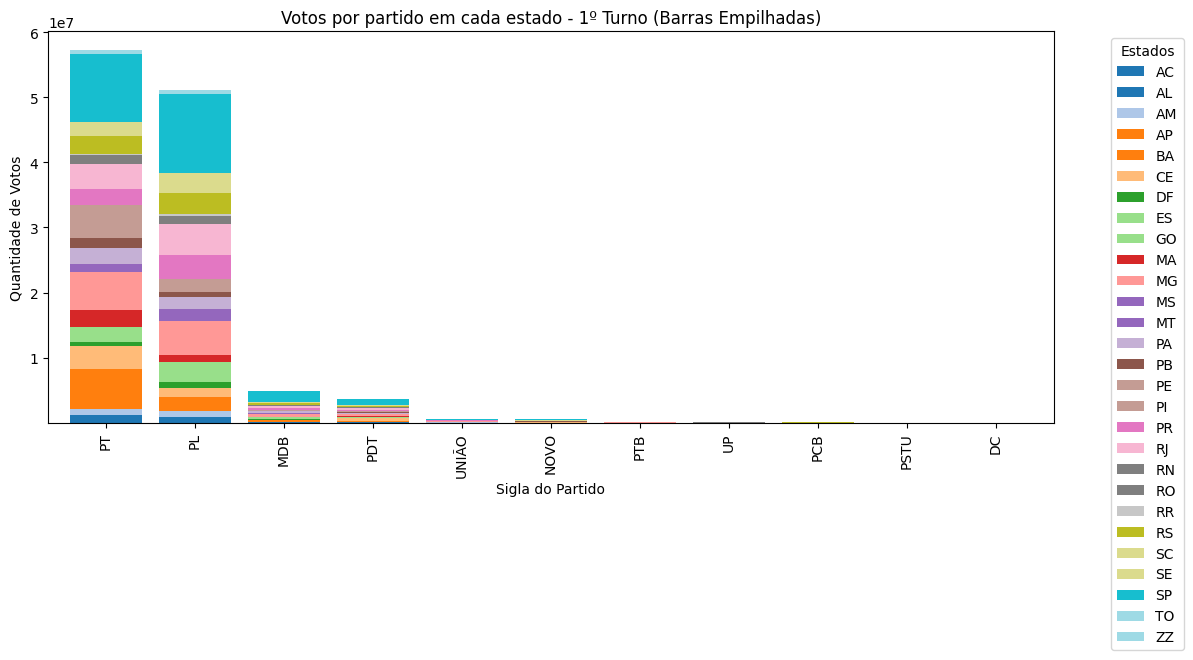

In [54]:
pivot_empilhado = dt_votos_partido_estado_1.pivot(index='Sigla_Partido', columns='Sigla_UF', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada estado - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
tabela_votos_partido_estado_1 = dt_votos_partido_estado_1.pivot(
    index='Sigla_Partido',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_estado_1['Total'] = tabela_votos_partido_estado_1.sum(axis=1)
tabela_votos_partido_estado_1 = tabela_votos_partido_estado_1.sort_values('Total', ascending=False)

In [56]:
tabela_votos_partido_estado_1

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Sigla_Partido,,,,,,,,,,,,,,,,,,,,,
PT,129022,974156,1019684,197382,5873081,3578355,649534,897348,1454723,2603454,...,1264179,261749,68760,2806672,1279216,828716,10490032,434303,138933,57259504
PL,275582,621515,880198,187621,2047599,1377827,910397,1160030,1920203,983861,...,622731,581306,207587,3245023,2694406,378610,12239989,379194,122548,51072345
MDB,20122,67411,87060,27497,197305,66214,105377,85325,170742,78254,...,38633,31217,12956,317957,191310,42073,1625596,25209,13167,4915423
PDT,12314,43542,44527,14670,217224,369222,74308,56221,90695,96095,...,71740,19353,6709,190945,88672,40247,898540,18141,13341,3599287
UNIÃO,2444,10683,17002,2955,65046,24497,7935,9944,28570,8709,...,4326,5777,1138,25207,20132,4416,153601,2788,753,600955
NOVO,825,2450,5212,1236,11605,7030,10342,8341,11145,4368,...,2937,2398,794,40601,48980,2194,183719,1266,3780,559708
PTB,279,3020,1373,359,4898,2278,1554,1752,2303,4357,...,860,749,190,4394,3369,631,15784,418,344,81129
UP,64,482,484,105,1926,1129,1262,672,1120,630,...,587,204,59,2332,1682,396,21665,129,319,53519
PCB,144,494,476,130,2423,1579,894,683,1073,727,...,606,232,64,2399,1812,364,14943,149,618,45620


#### Filtro: 2º Turno

In [57]:
dt_votos_nominais_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
dt_votos_por_partido_2 = dt_votos_nominais_2.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)


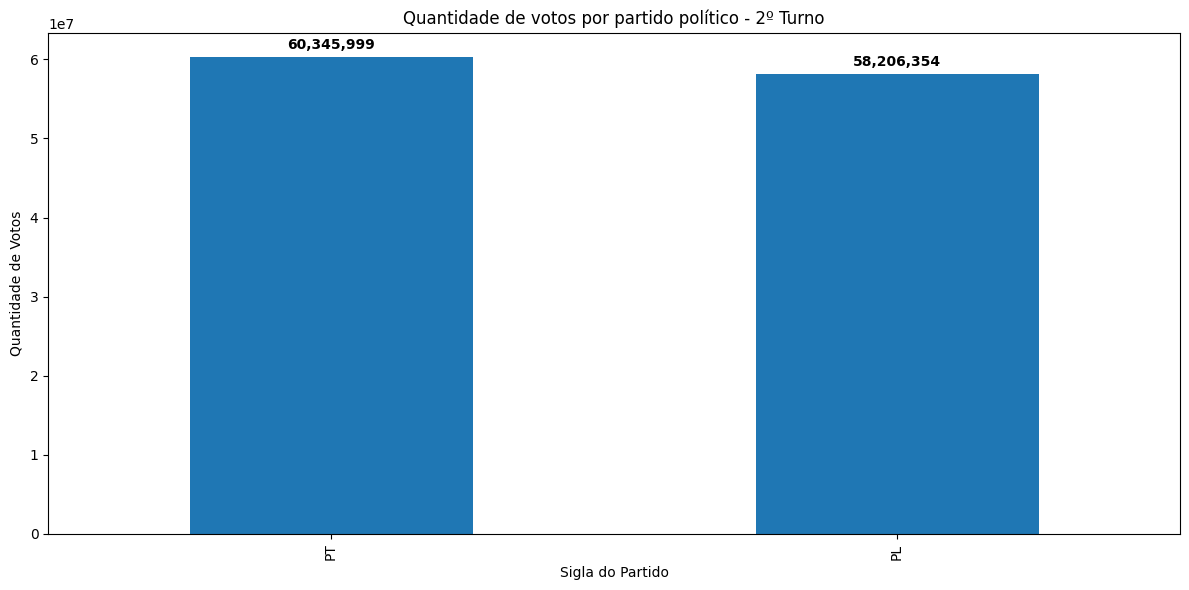

In [58]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_2.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos por partido político - 2º Turno')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_2):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_2)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno, Região

In [59]:
dt_votos_partido_regiao_2 = dt_votos_nominais_2.groupby(['Regiao', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

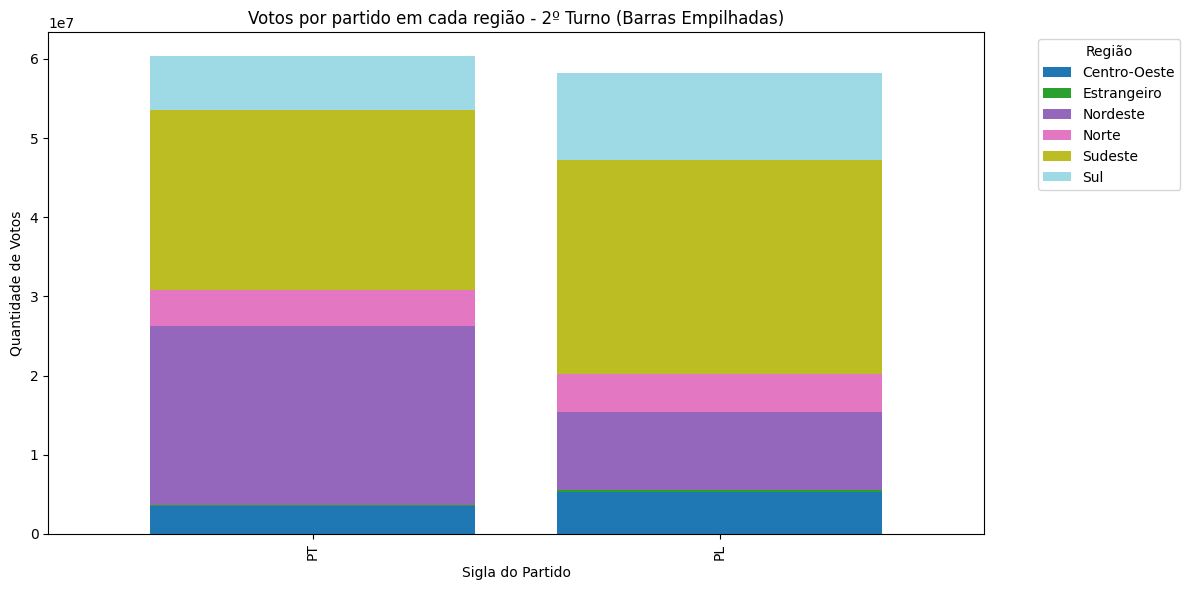

In [60]:
pivot_empilhado = dt_votos_partido_regiao_2.pivot(index='Sigla_Partido', columns='Regiao', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada região - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
tabela_votos_partido_regiao_2 = dt_votos_partido_regiao_2.pivot(
    index='Sigla_Partido',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_regiao_2['Total'] = tabela_votos_partido_regiao_2.sum(axis=1)
tabela_votos_partido_regiao_2 = tabela_votos_partido_regiao_2.sort_values('Total', ascending=False)

In [62]:
tabela_votos_partido_regiao_2

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Sigla_Partido,,,,,,,
PT,3523743,152905,22534967,4590184,22793826,6750374,60345999
PL,5331708,145264,9962947,4782341,27043936,10940158,58206354


#### Filtro: 1º Turno e Estado

In [63]:
dt_votos_partido_estado_2 = dt_votos_nominais_2.groupby(['Sigla_UF', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

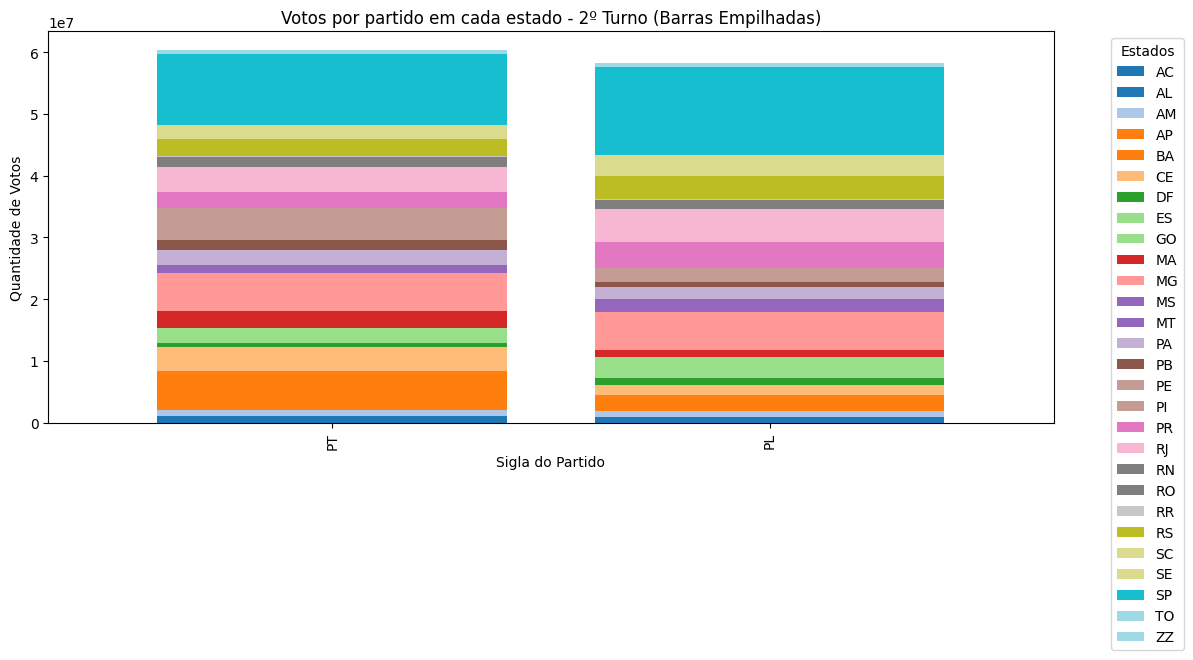

In [64]:
pivot_empilhado = dt_votos_partido_estado_2.pivot(index='Sigla_Partido', columns='Sigla_UF', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada estado - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
tabela_votos_partido_estado_2 = dt_votos_partido_estado_2.pivot(
    index='Sigla_Partido',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_estado_2['Total'] = tabela_votos_partido_estado_2.sum(axis=1)
tabela_votos_partido_estado_2 = tabela_votos_partido_estado_2.sort_values('Total', ascending=False)

In [66]:
tabela_votos_partido_estado_2

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Sigla_Partido,,,,,,,,,,,,,,,,,,,,,
PT,121566,976831,1004991,189918,6097815,3807891,729295,926767,1542115,2668425,...,1326785,262904,67128,2891851,1351918,862951,11519882,434593,152905,60345999
PL,287750,687827,961741,200547,2357028,1634477,1041331,1282145,2193041,1082749,...,711381,633236,213518,3733185,3047630,421086,14216587,411654,145264,58206354


#### Filtro: Nenhum

In [67]:
dt_votos_nominais_total = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal']
dt_votos_por_partido_total = dt_votos_nominais_total.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)

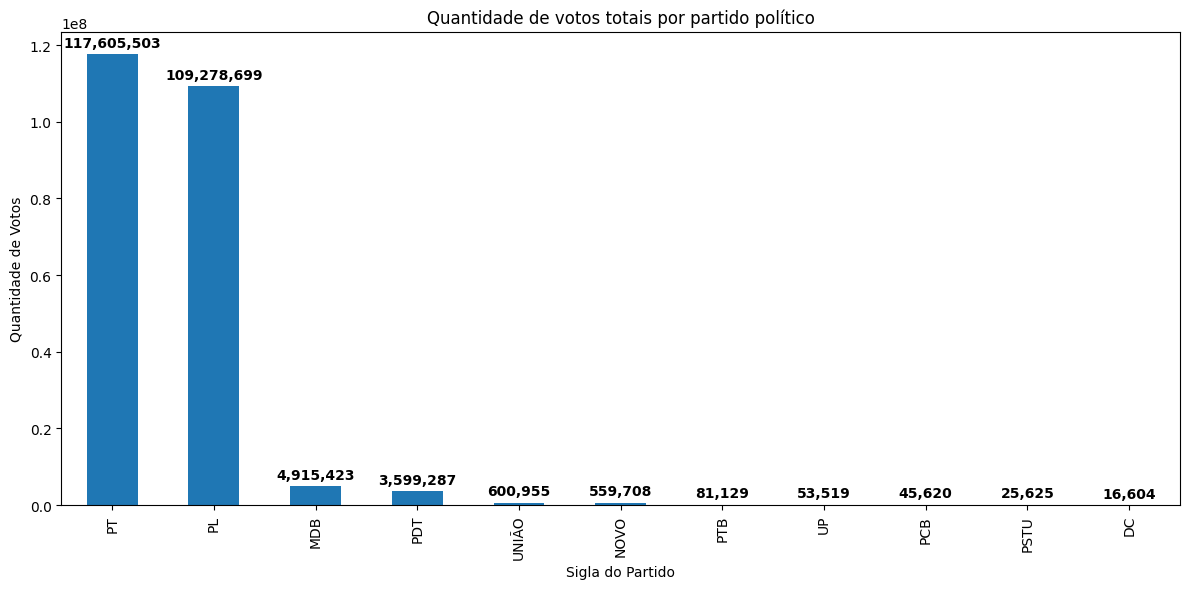

In [68]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_total.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos totais por partido político')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_total):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_total)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por candidato

#### Filtro: 1º Turno

In [69]:
votos_candidato_turno_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
votos_candidato_sum_1 = votos_candidato_turno_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

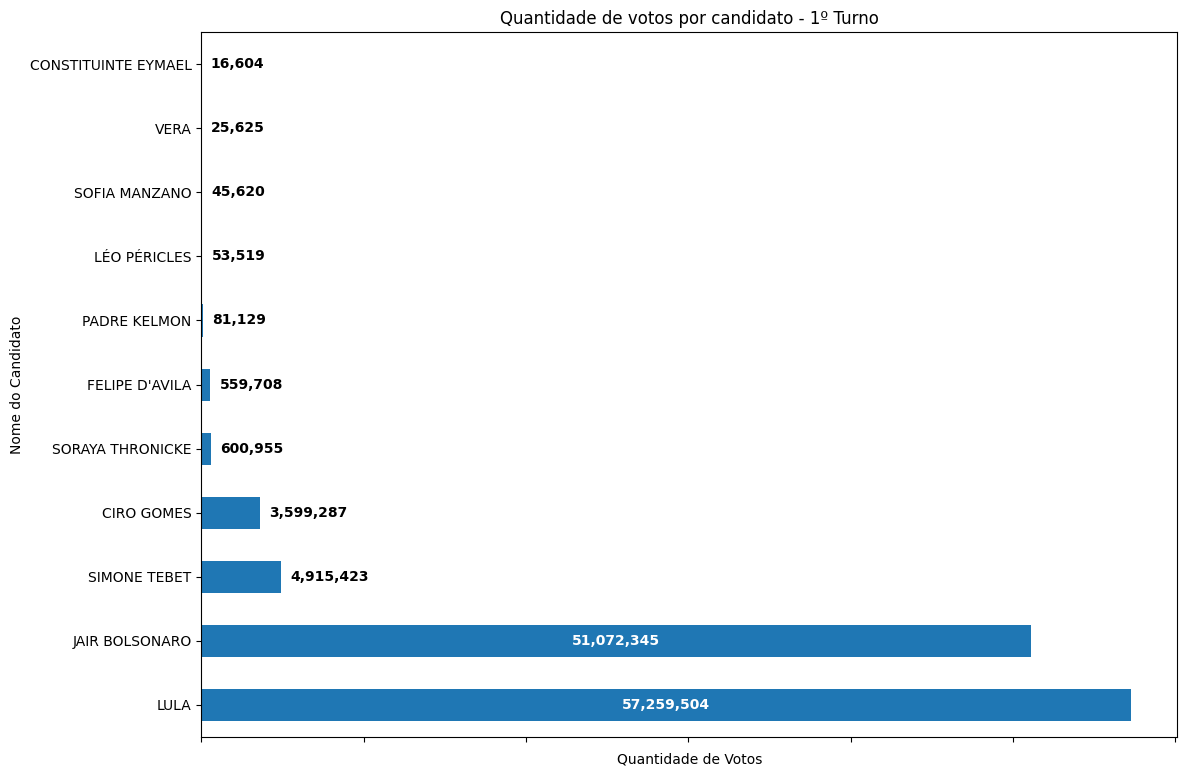

In [70]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_1.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por candidato - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_1):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_1) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 1º Turno e Região

In [71]:
dt_votos_candidato_regiao_1 = dt_votos_nominais_1.groupby(['Regiao', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

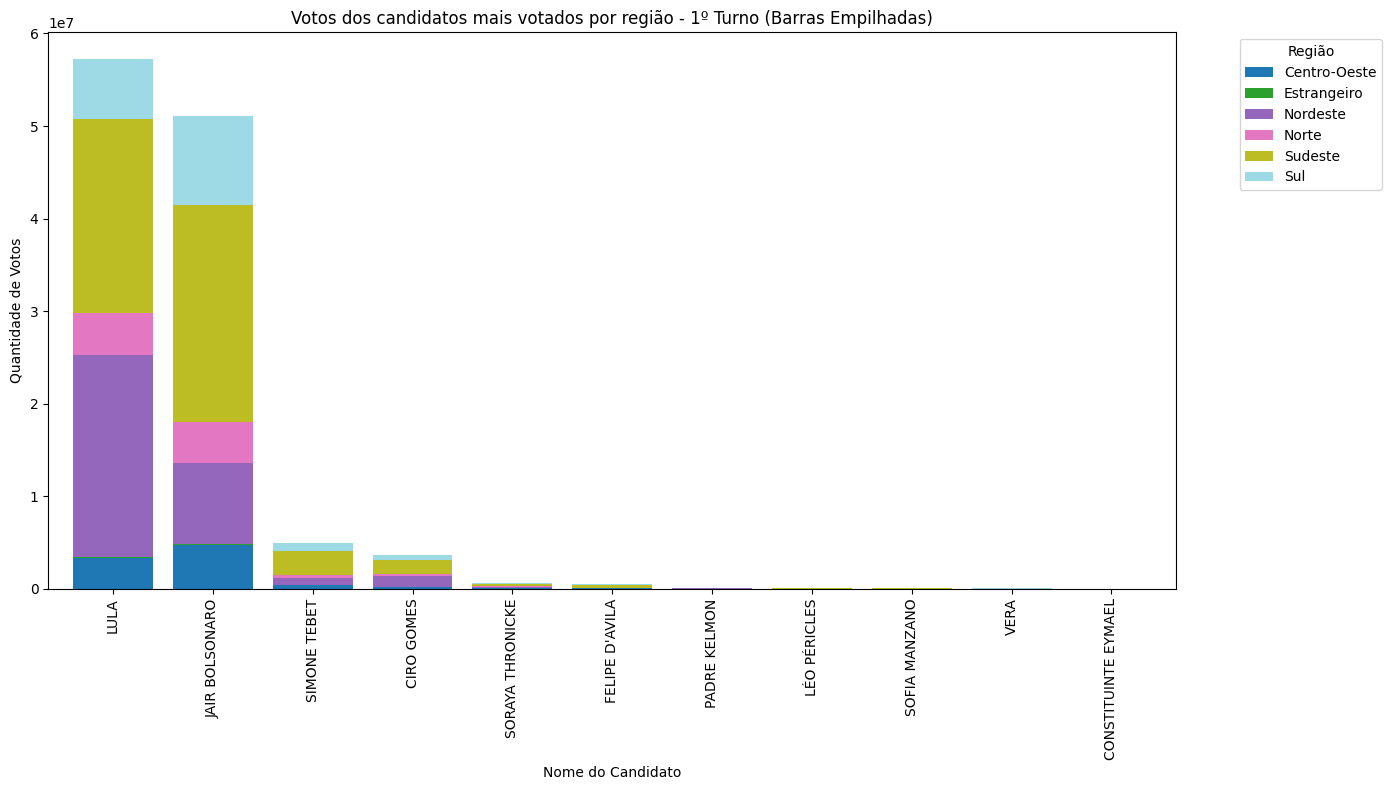

In [72]:
pivot = dt_votos_candidato_regiao_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_regiao_1[dt_votos_candidato_regiao_1['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]  # Mantém ordem dos mais votados

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por região - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
tabela_votos_candidato_regiao_1 = dt_votos_candidato_regiao_1.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_regiao_1['Total'] = tabela_votos_candidato_regiao_1.sum(axis=1)
tabela_votos_candidato_regiao_1 = tabela_votos_candidato_regiao_1.sort_values('Total', ascending=False)

In [74]:
tabela_votos_candidato_regiao_1

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Nome_Votavel,,,,,,,
LULA,3326328,138933,21753139,4554630,21037094,6449380,57259504
JAIR BOLSONARO,4727672,122548,8787394,4396161,23470529,9568041,51072345
SIMONE TEBET,411827,13167,685793,408136,2577548,818952,4915423
CIRO GOMES,223754,13341,1103631,231771,1566574,460216,3599287
SORAYA THRONICKE,57302,753,160129,51401,251906,79464,600955
FELIPE D'AVILA,31051,3780,45775,17861,333677,127564,559708
PADRE KELMON,7459,344,21646,6151,32605,12924,81129
LÉO PÉRICLES,3098,319,7292,2049,34658,6103,53519
SOFIA MANZANO,2744,618,8673,2115,24515,6955,45620


#### Filtro: 1º Turno e Estado

In [75]:
dt_votos_candidato_estado_1 = dt_votos_nominais_1.groupby(['Sigla_UF', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

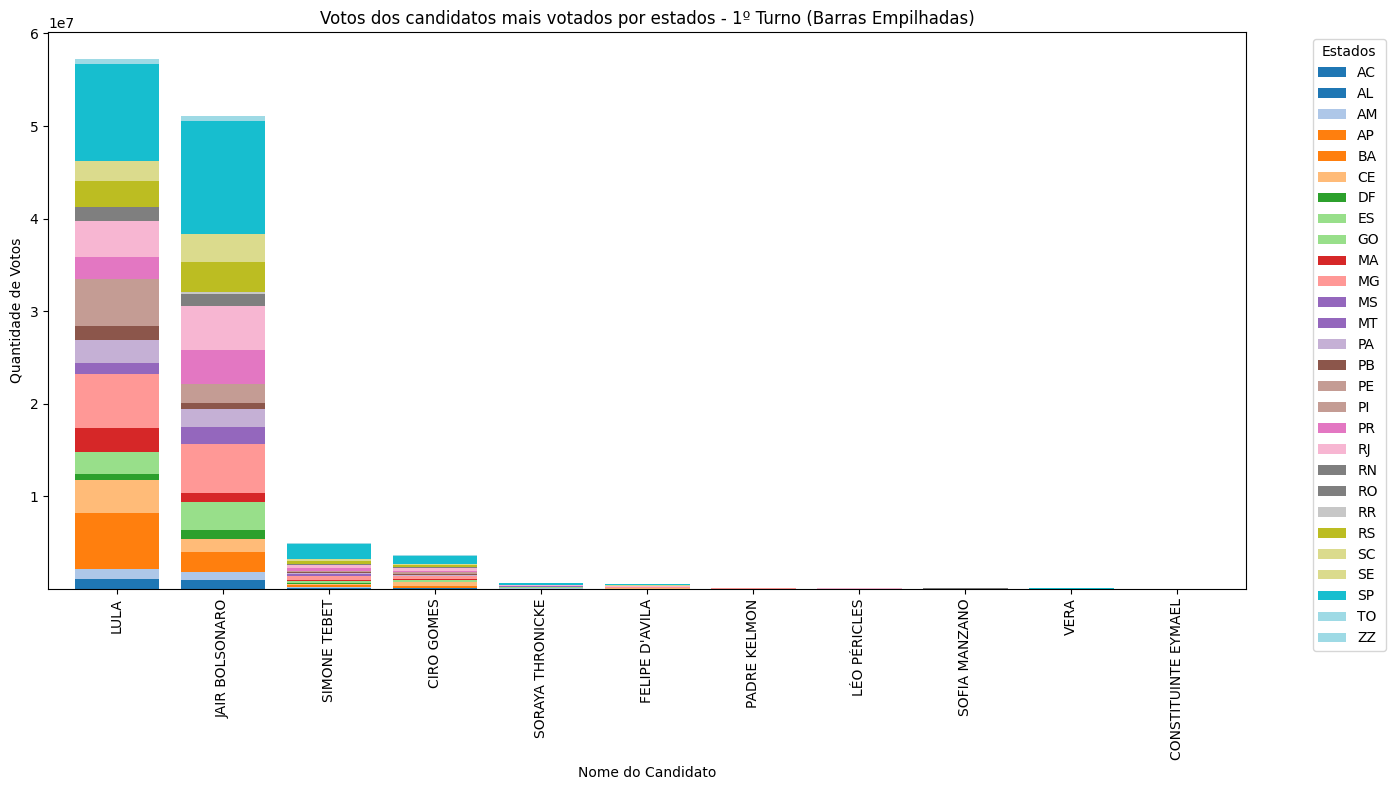

In [76]:
pivot = dt_votos_candidato_estado_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_estado_1[dt_votos_candidato_estado_1['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por estados - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
tabela_votos_candidato_estado_1 = dt_votos_candidato_estado_1.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_estado_1['Total'] = tabela_votos_candidato_estado_1.sum(axis=1)
tabela_votos_candidato_estado_1 = tabela_votos_candidato_estado_1.sort_values('Total', ascending=False)

In [78]:
tabela_votos_candidato_estado_1

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Nome_Votavel,,,,,,,,,,,,,,,,,,,,,
LULA,129022,974156,1019684,197382,5873081,3578355,649534,897348,1454723,2603454,...,1264179,261749,68760,2806672,1279216,828716,10490032,434303,138933,57259504
JAIR BOLSONARO,275582,621515,880198,187621,2047599,1377827,910397,1160030,1920203,983861,...,622731,581306,207587,3245023,2694406,378610,12239989,379194,122548,51072345
SIMONE TEBET,20122,67411,87060,27497,197305,66214,105377,85325,170742,78254,...,38633,31217,12956,317957,191310,42073,1625596,25209,13167,4915423
CIRO GOMES,12314,43542,44527,14670,217224,369222,74308,56221,90695,96095,...,71740,19353,6709,190945,88672,40247,898540,18141,13341,3599287
SORAYA THRONICKE,2444,10683,17002,2955,65046,24497,7935,9944,28570,8709,...,4326,5777,1138,25207,20132,4416,153601,2788,753,600955
FELIPE D'AVILA,825,2450,5212,1236,11605,7030,10342,8341,11145,4368,...,2937,2398,794,40601,48980,2194,183719,1266,3780,559708
PADRE KELMON,279,3020,1373,359,4898,2278,1554,1752,2303,4357,...,860,749,190,4394,3369,631,15784,418,344,81129
LÉO PÉRICLES,64,482,484,105,1926,1129,1262,672,1120,630,...,587,204,59,2332,1682,396,21665,129,319,53519
SOFIA MANZANO,144,494,476,130,2423,1579,894,683,1073,727,...,606,232,64,2399,1812,364,14943,149,618,45620


#### Filtro: 2º Turno

In [79]:
votos_candidato_turno_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
votos_candidato_sum_2 = votos_candidato_turno_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

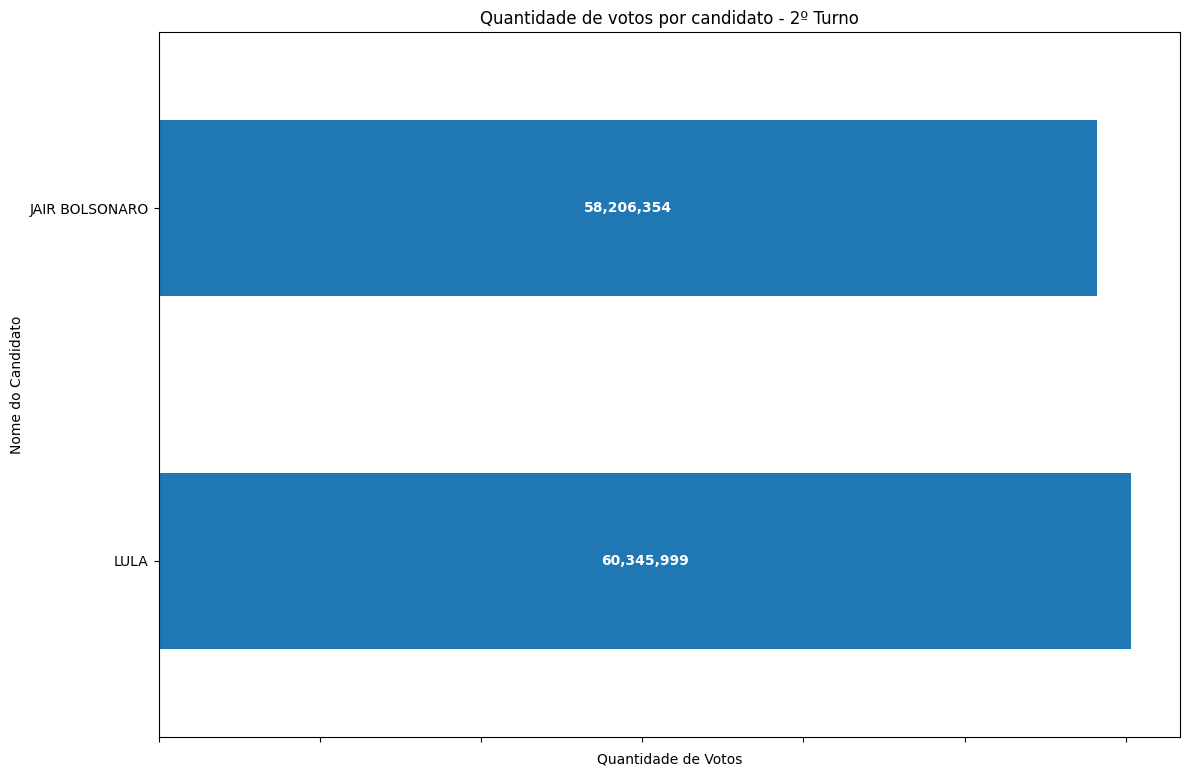

In [80]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_2.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por candidato - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_2):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_2) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno e Região

In [81]:
dt_votos_candidato_regiao_2 = dt_votos_nominais_2.groupby(['Regiao', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

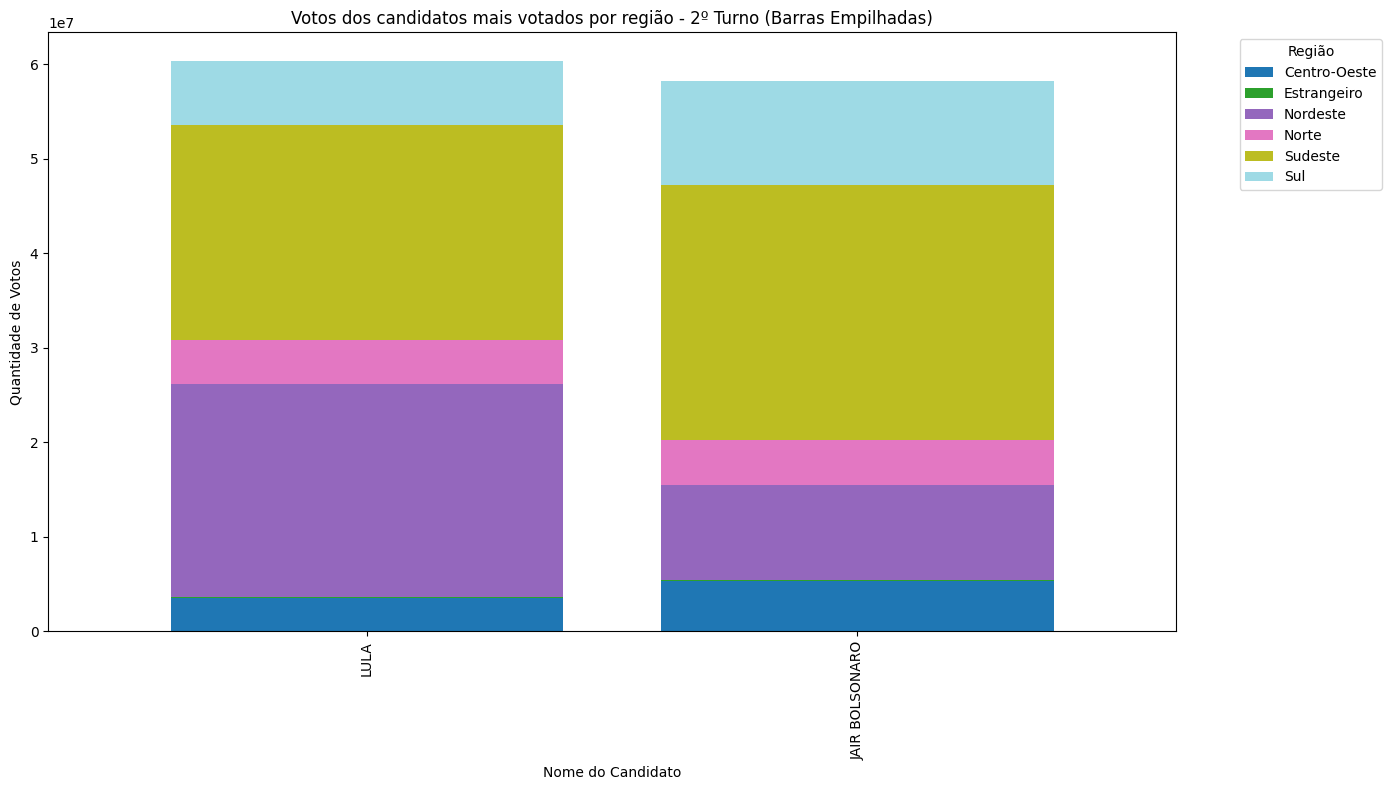

In [82]:
pivot = dt_votos_candidato_regiao_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_regiao_2[dt_votos_candidato_regiao_2['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]  # Mantém ordem dos mais votados

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por região - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
tabela_votos_candidato_regiao_2 = dt_votos_candidato_regiao_2.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_regiao_2['Total'] = tabela_votos_candidato_regiao_2.sum(axis=1)
tabela_votos_candidato_regiao_2 = tabela_votos_candidato_regiao_2.sort_values('Total', ascending=False)

In [84]:
tabela_votos_candidato_regiao_2

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Nome_Votavel,,,,,,,
LULA,3523743,152905,22534967,4590184,22793826,6750374,60345999
JAIR BOLSONARO,5331708,145264,9962947,4782341,27043936,10940158,58206354


#### Filtro: 2º Turno e Estado

In [85]:
dt_votos_candidato_estado_2 = dt_votos_nominais_2.groupby(['Sigla_UF', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

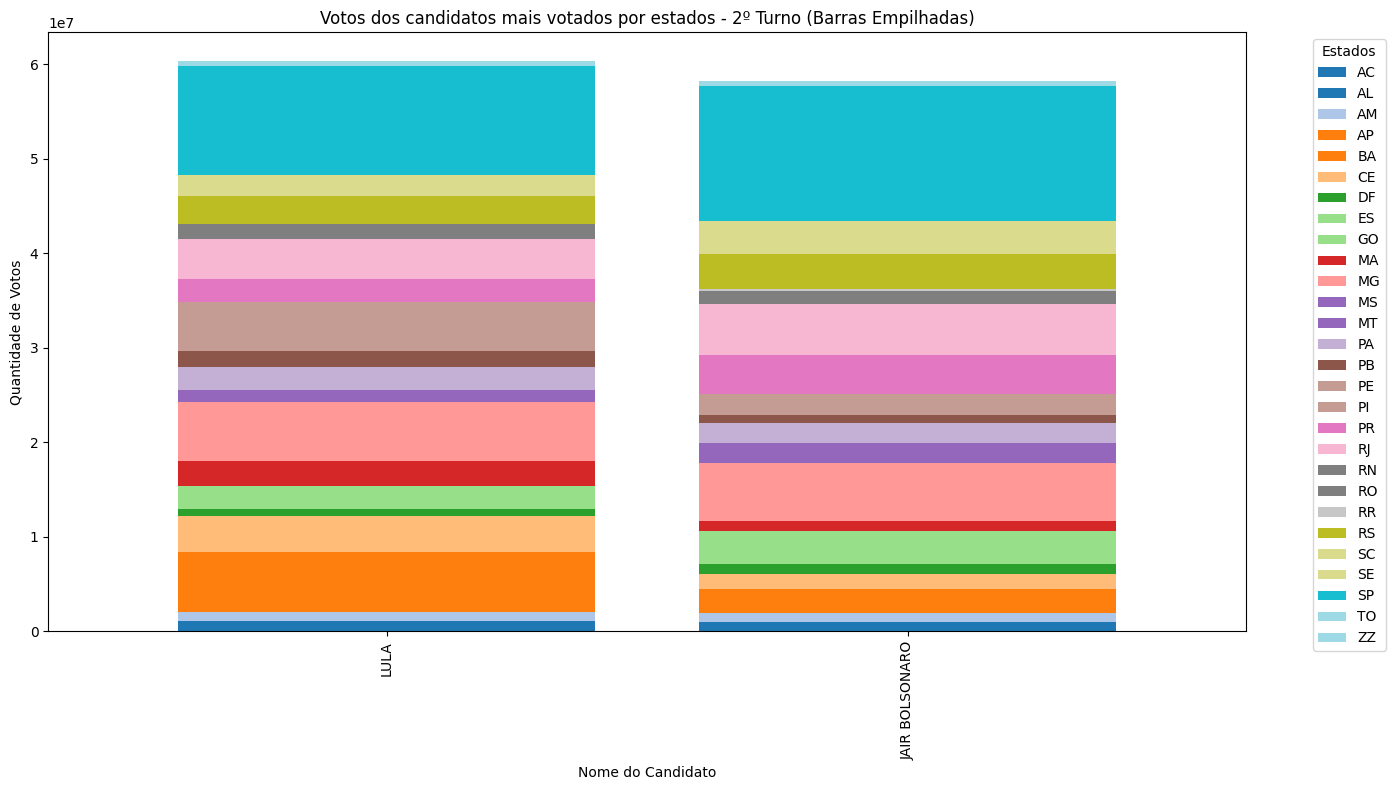

In [86]:
pivot = dt_votos_candidato_estado_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_estado_2[dt_votos_candidato_estado_2['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por estados - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [87]:
tabela_votos_candidato_estado_2 = dt_votos_candidato_estado_2.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_estado_2['Total'] = tabela_votos_candidato_estado_2.sum(axis=1)
tabela_votos_candidato_estado_2 = tabela_votos_candidato_estado_2.sort_values('Total', ascending=False)

In [88]:
tabela_votos_candidato_estado_2

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Nome_Votavel,,,,,,,,,,,,,,,,,,,,,
LULA,121566,976831,1004991,189918,6097815,3807891,729295,926767,1542115,2668425,...,1326785,262904,67128,2891851,1351918,862951,11519882,434593,152905,60345999
JAIR BOLSONARO,287750,687827,961741,200547,2357028,1634477,1041331,1282145,2193041,1082749,...,711381,633236,213518,3733185,3047630,421086,14216587,411654,145264,58206354


#### Filtros: Nenhum

In [89]:
votos_candidato_turno_total = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal')
]
votos_candidato_sum_total = votos_candidato_turno_total.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

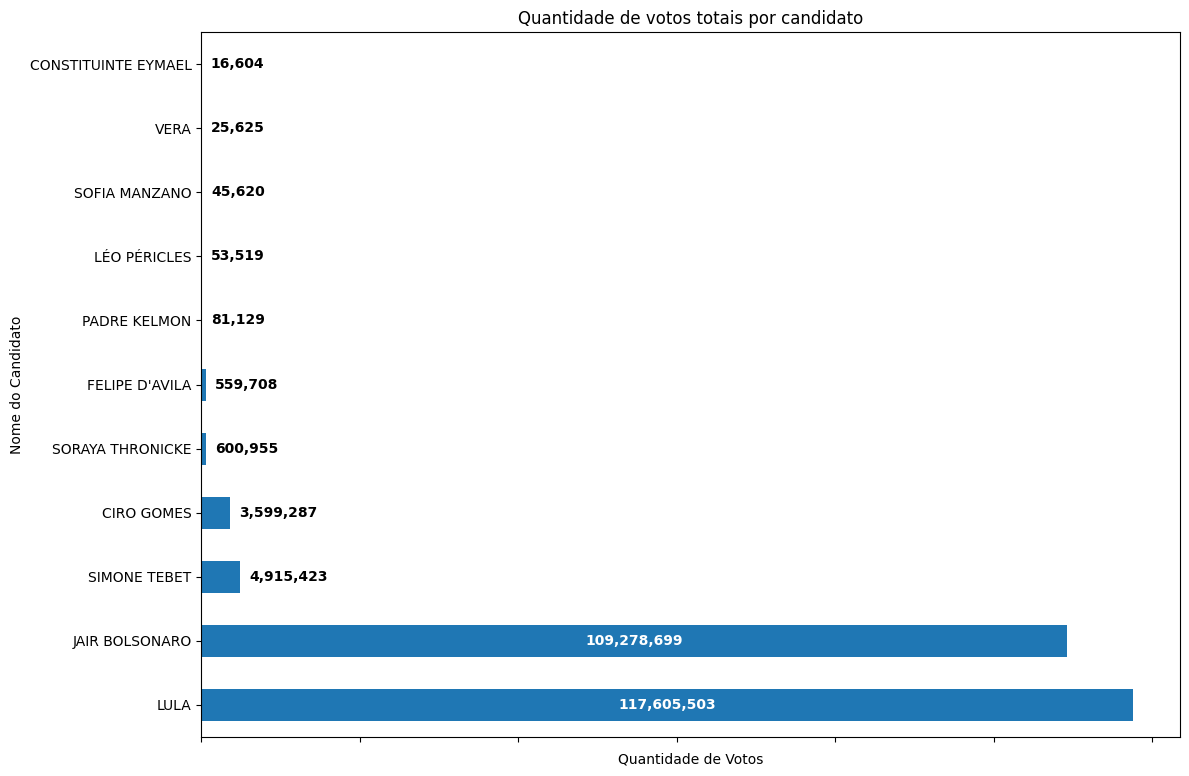

In [90]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_total.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos totais por candidato')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_total):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_total) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_total)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()